In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import math 
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix
import warnings

In [2]:
import os
for dirname, _, filenames in os.walk('diabetes.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
df=pd.DataFrame(data.drop('Pregnancies',axis=1))
df
   

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [11]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


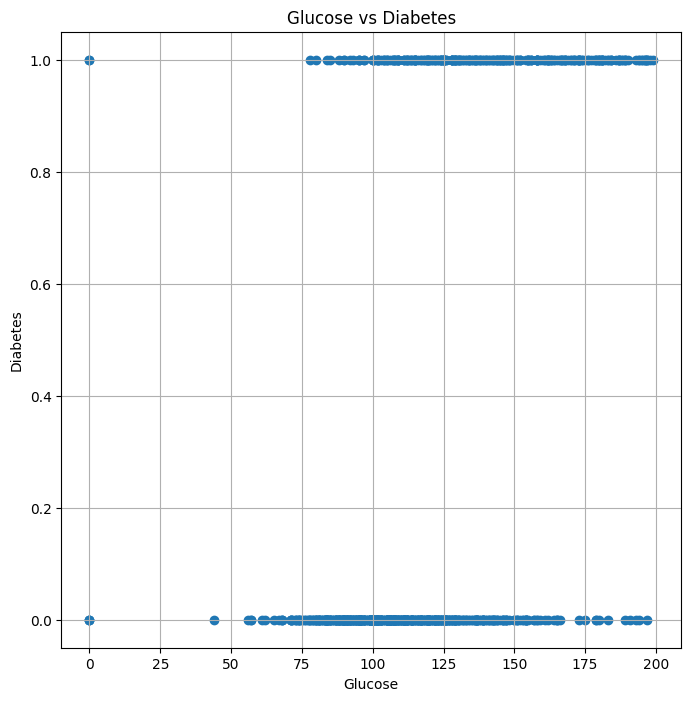

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(df['Glucose'],df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Diabetes')
plt.title('Glucose vs Diabetes')
plt.grid()

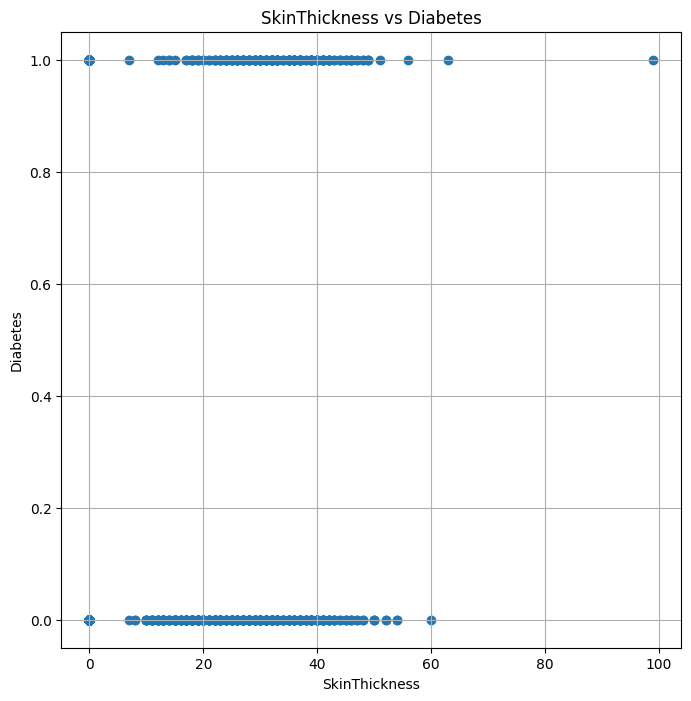

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(df['SkinThickness'],df['Outcome'])
plt.xlabel('SkinThickness')
plt.ylabel('Diabetes')
plt.title('SkinThickness vs Diabetes')
plt.grid()

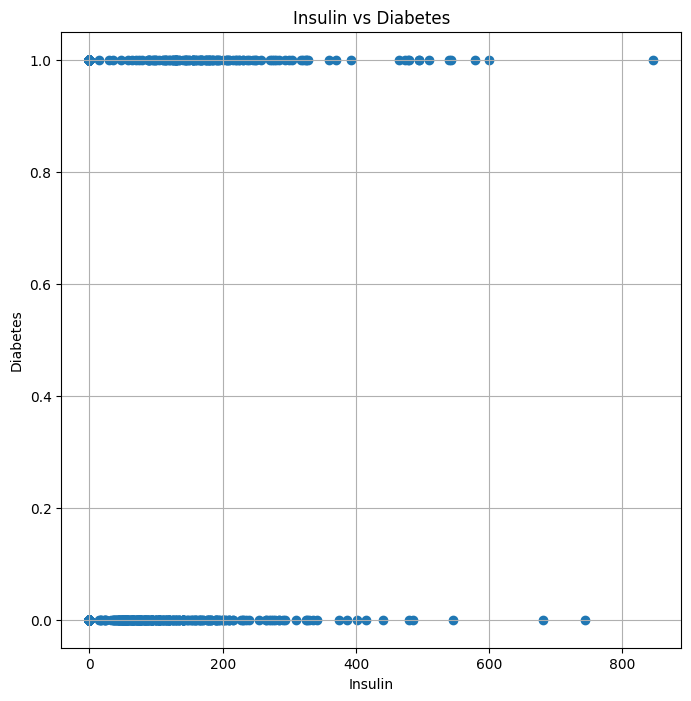

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(df['Insulin'],df['Outcome'])
plt.xlabel('Insulin')
plt.ylabel('Diabetes')
plt.title('Insulin vs Diabetes')
plt.grid()

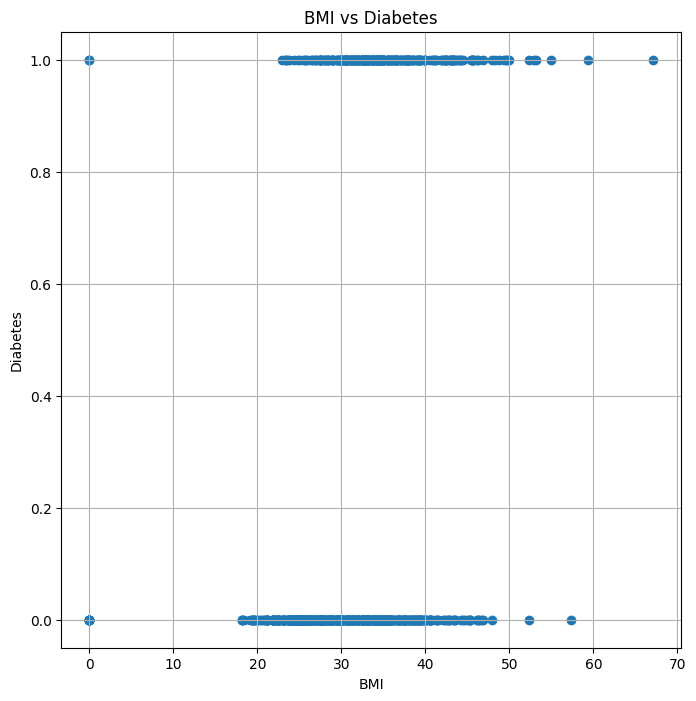

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df['BMI'],df['Outcome'])
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.title('BMI vs Diabetes')
plt.grid()

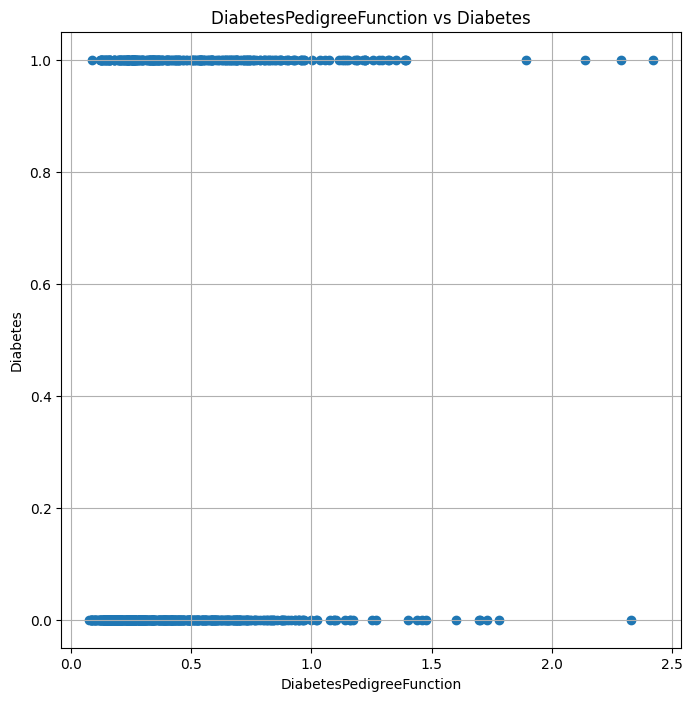

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(df['DiabetesPedigreeFunction'],df['Outcome'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Diabetes')
plt.title('DiabetesPedigreeFunction vs Diabetes')
plt.grid()

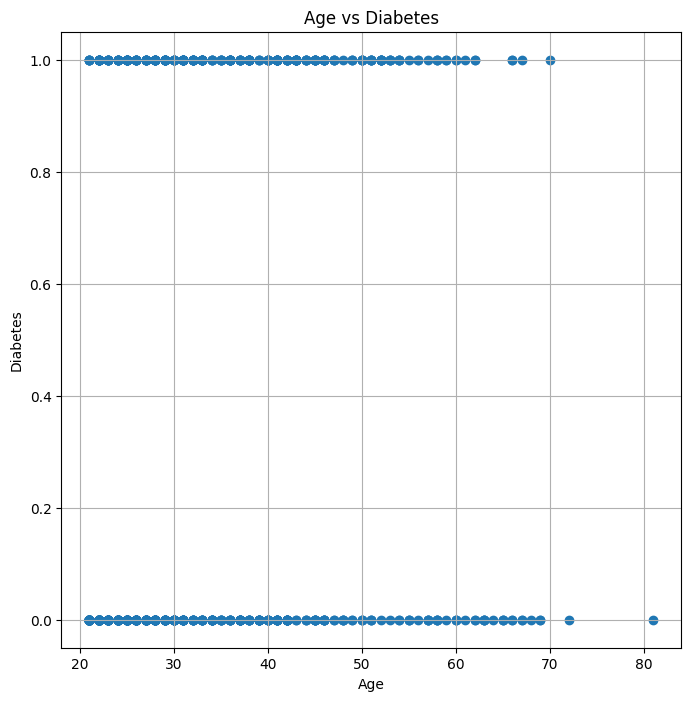

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(df['Age'],df['Outcome'])
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Age vs Diabetes')
plt.grid()

In [18]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


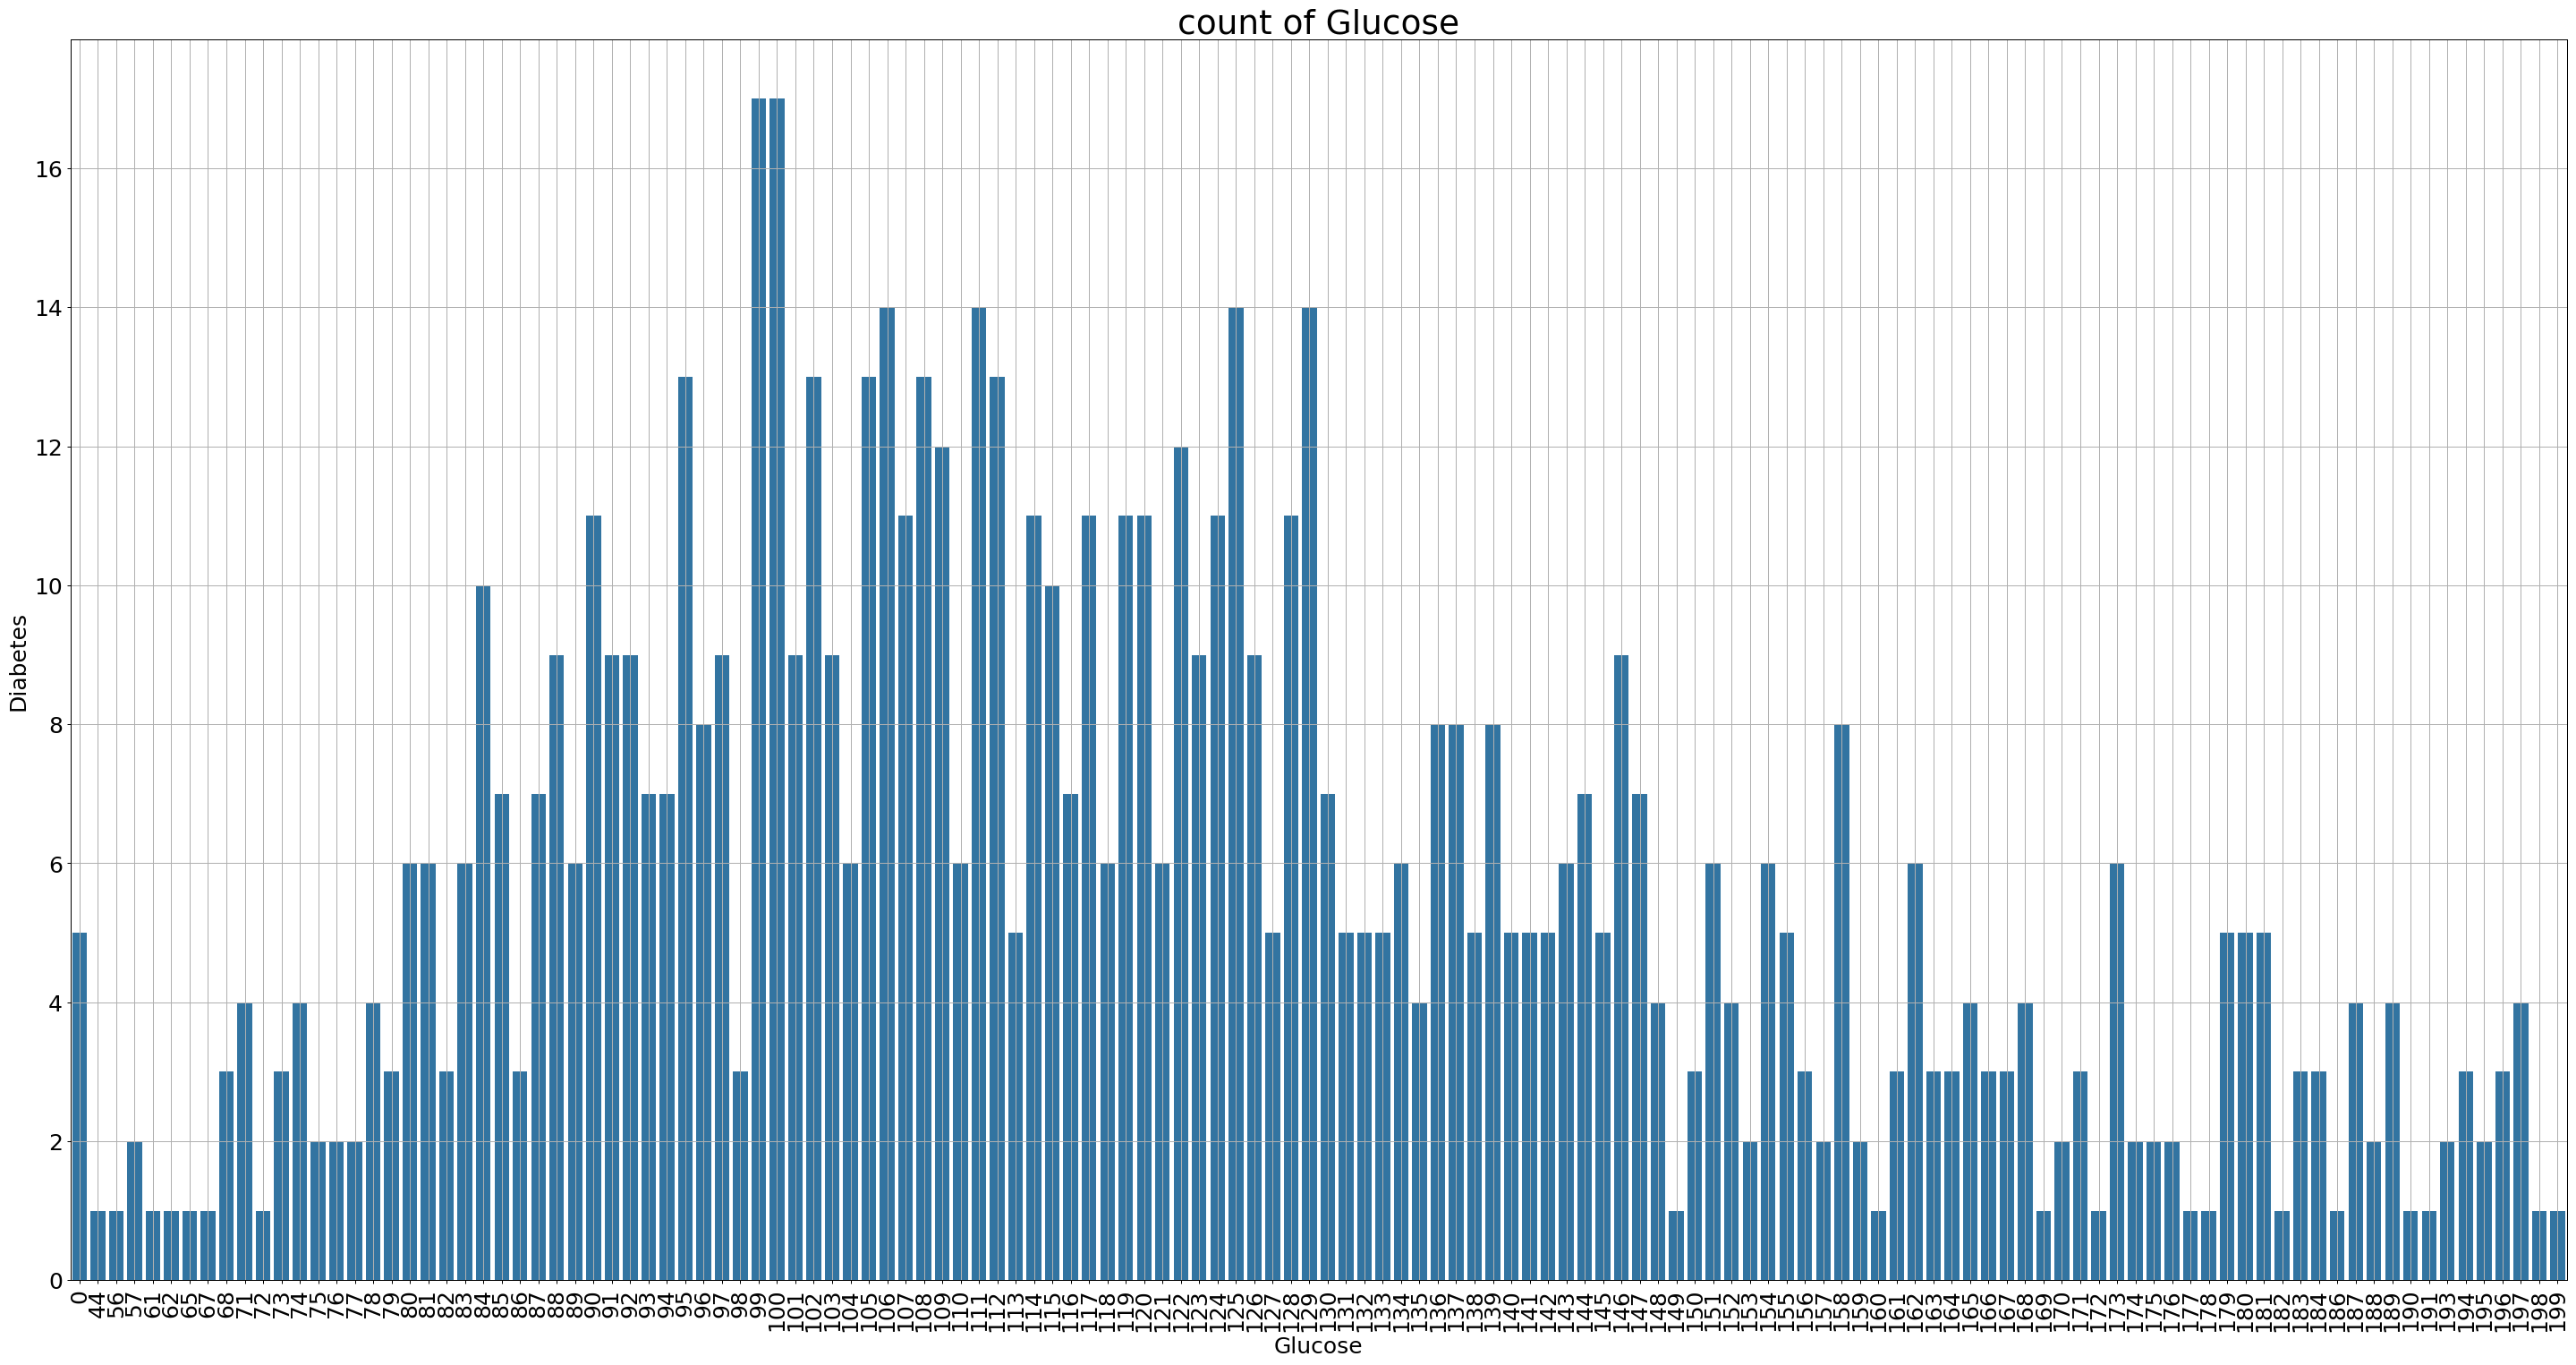

In [19]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Glucose',data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Glucose',fontsize=30)
plt.grid()

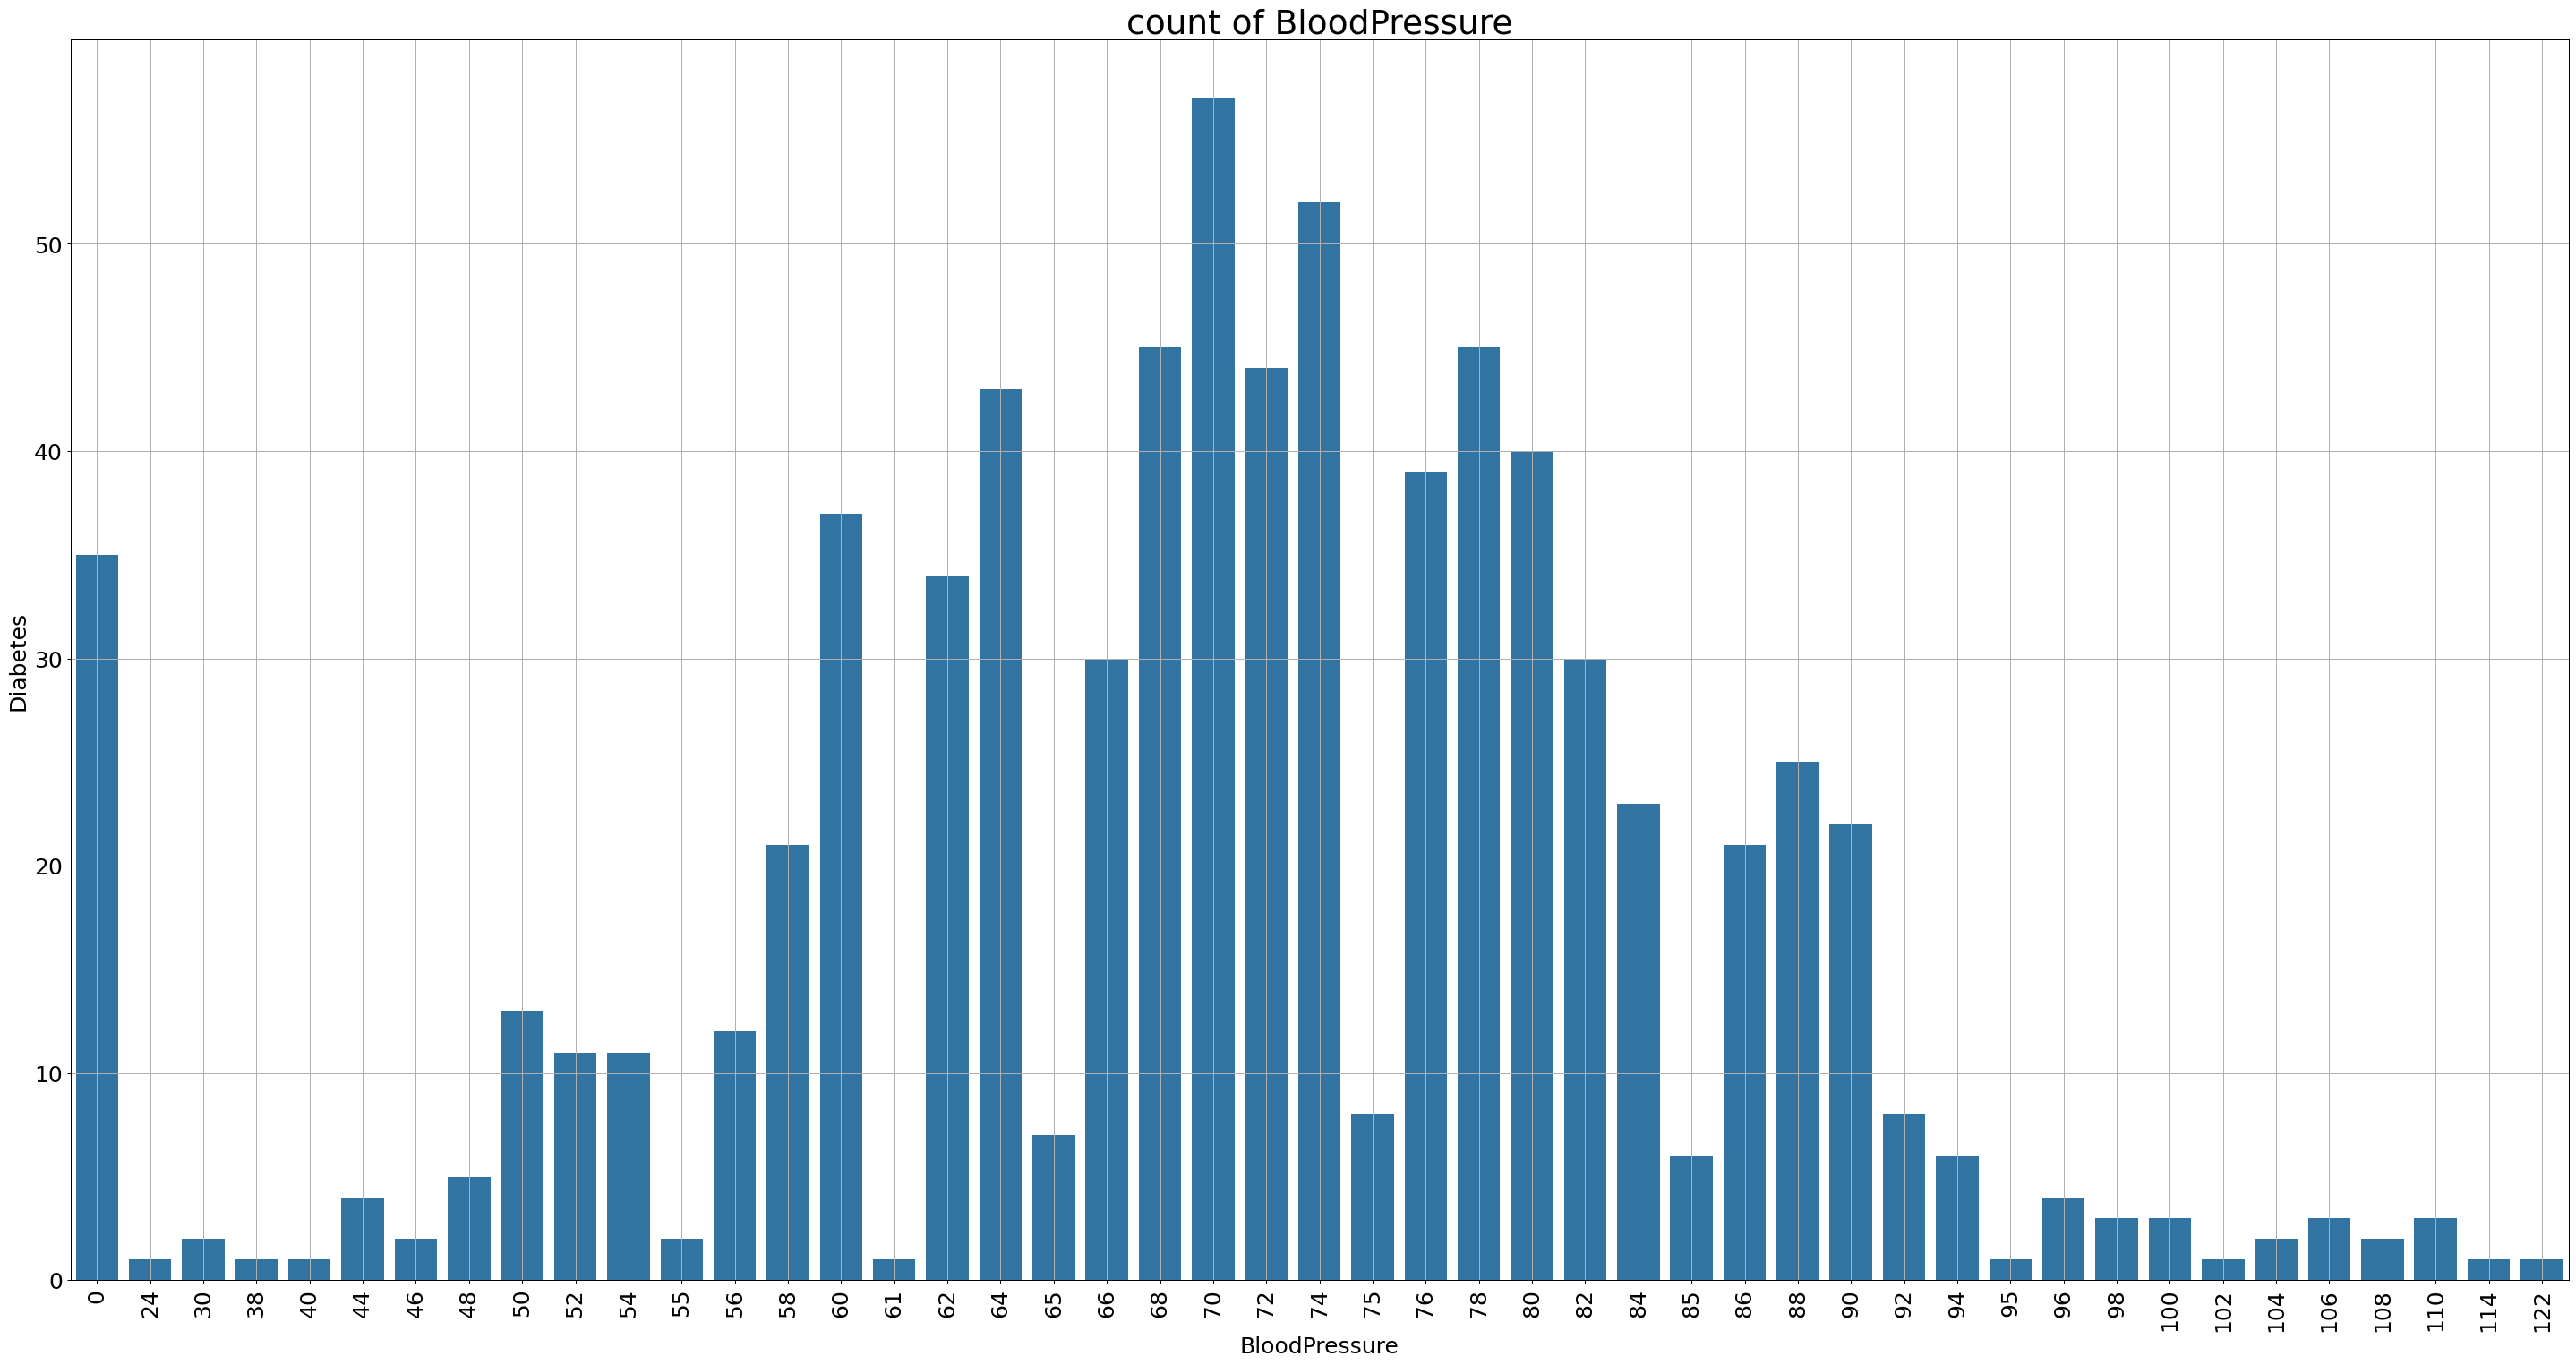

In [20]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='BloodPressure',data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BloodPressure',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of BloodPressure',fontsize=30)
plt.grid()

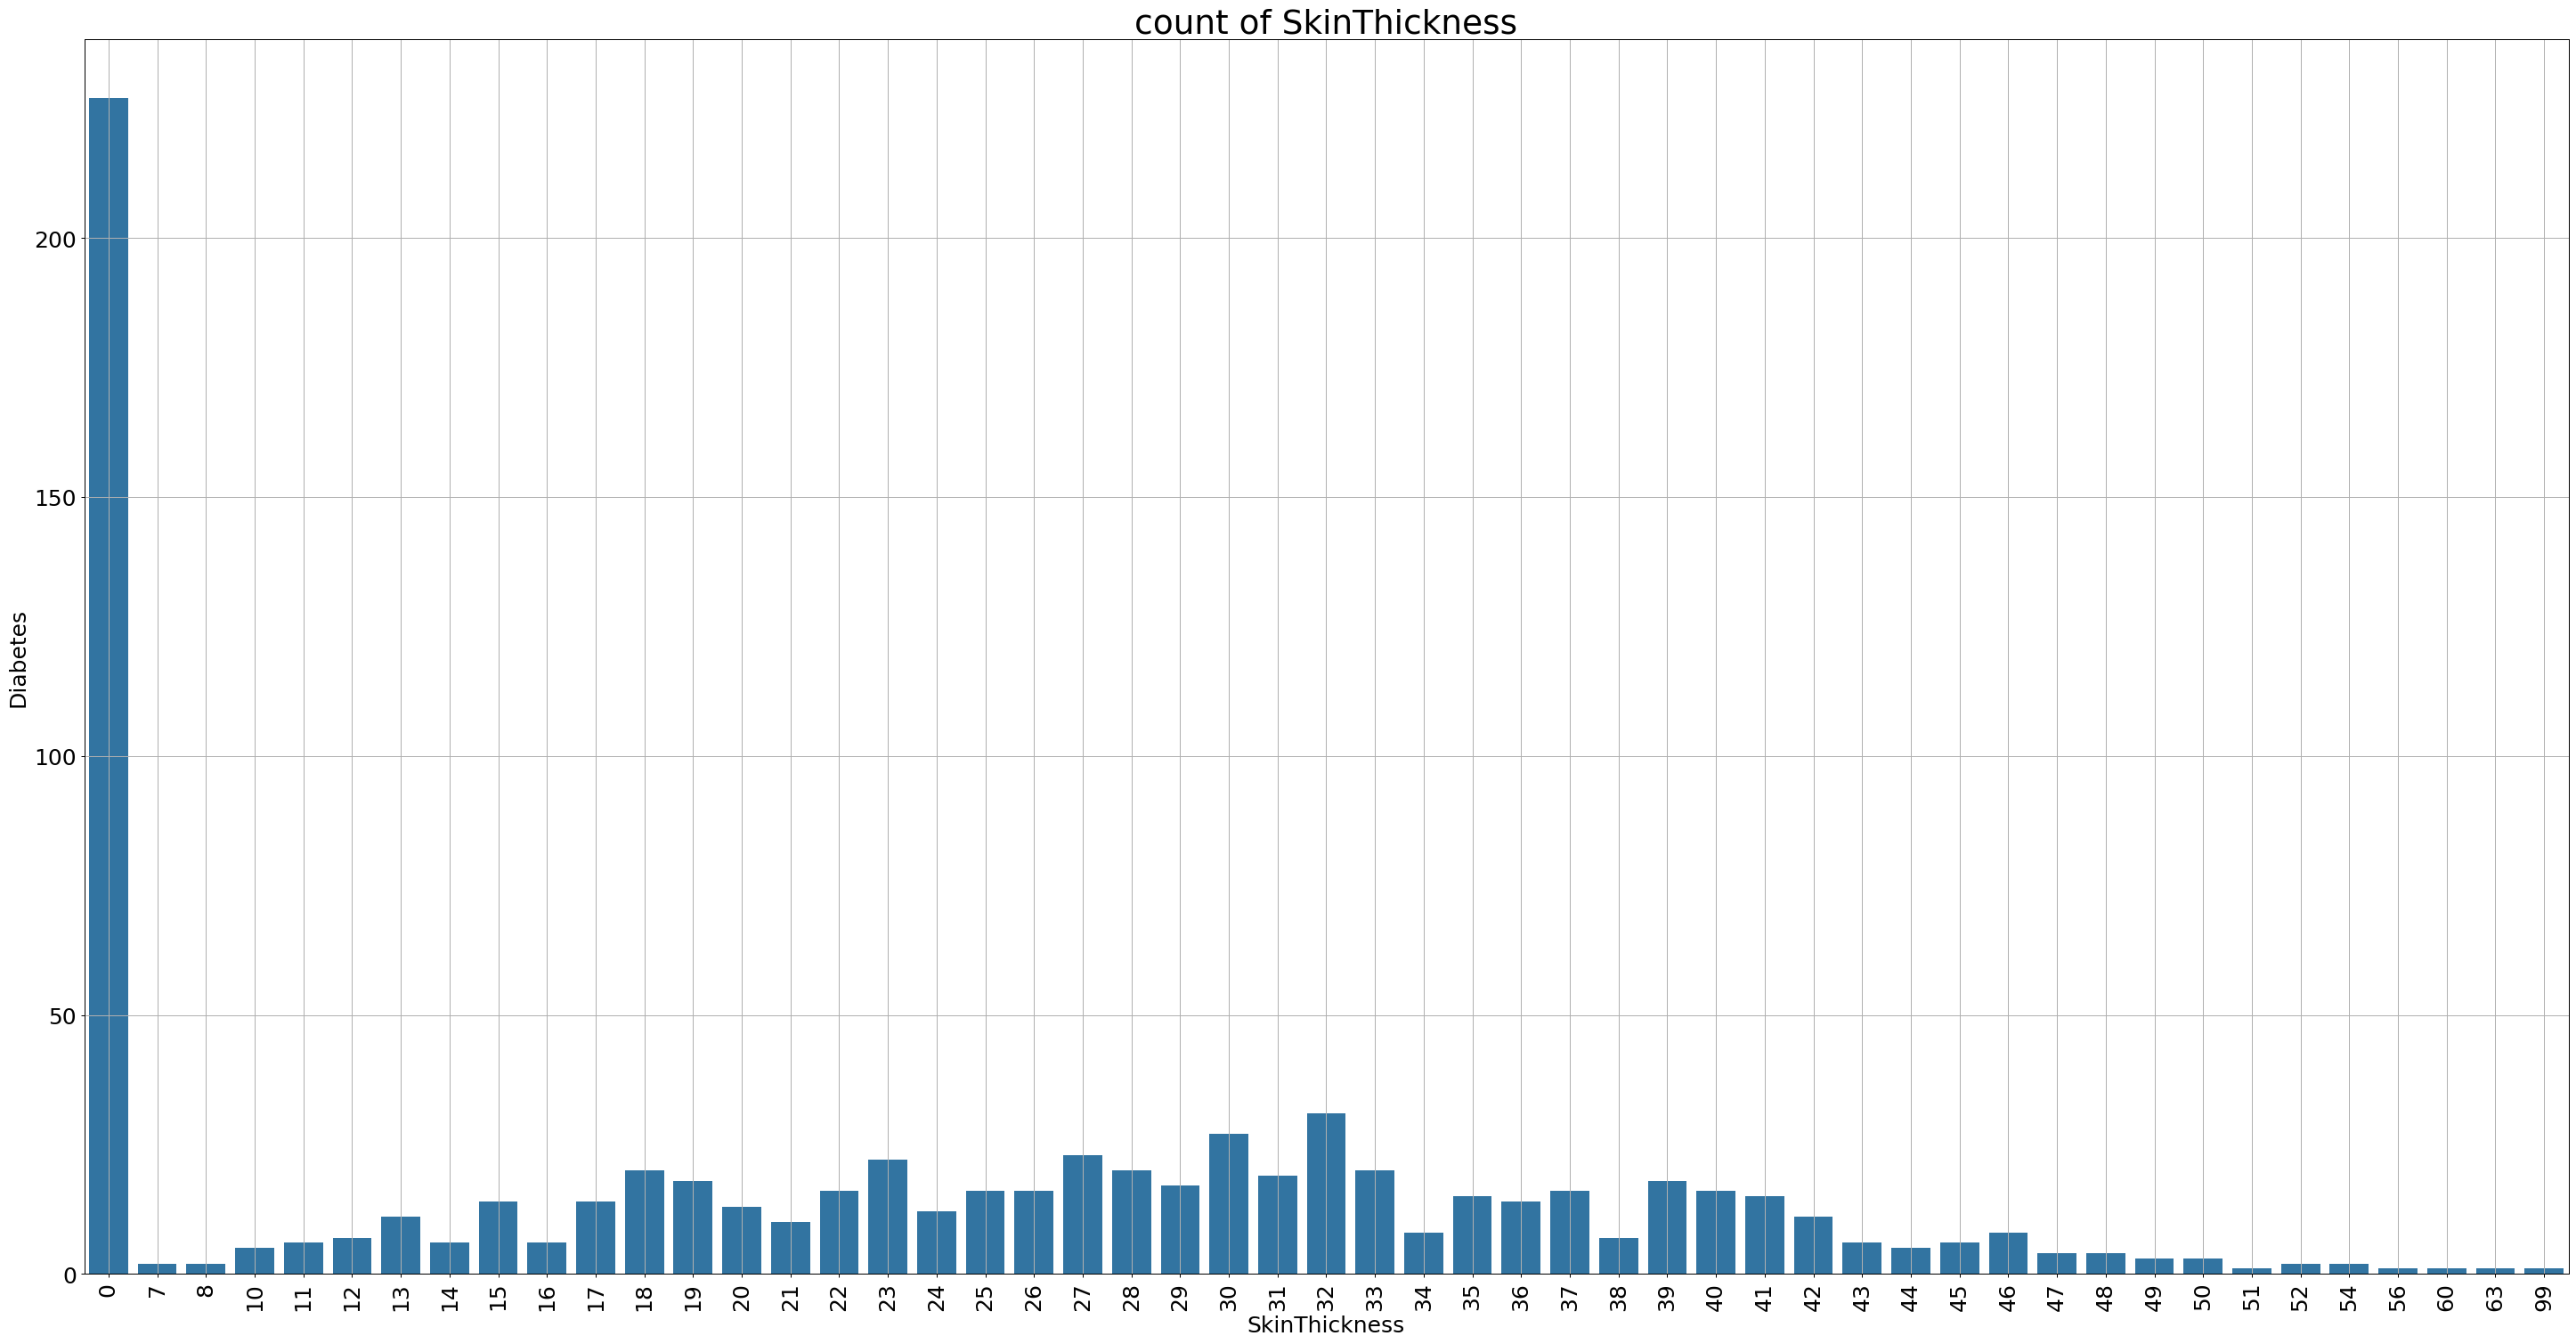

In [21]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='SkinThickness',data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of SkinThickness',fontsize=30)
plt.grid()

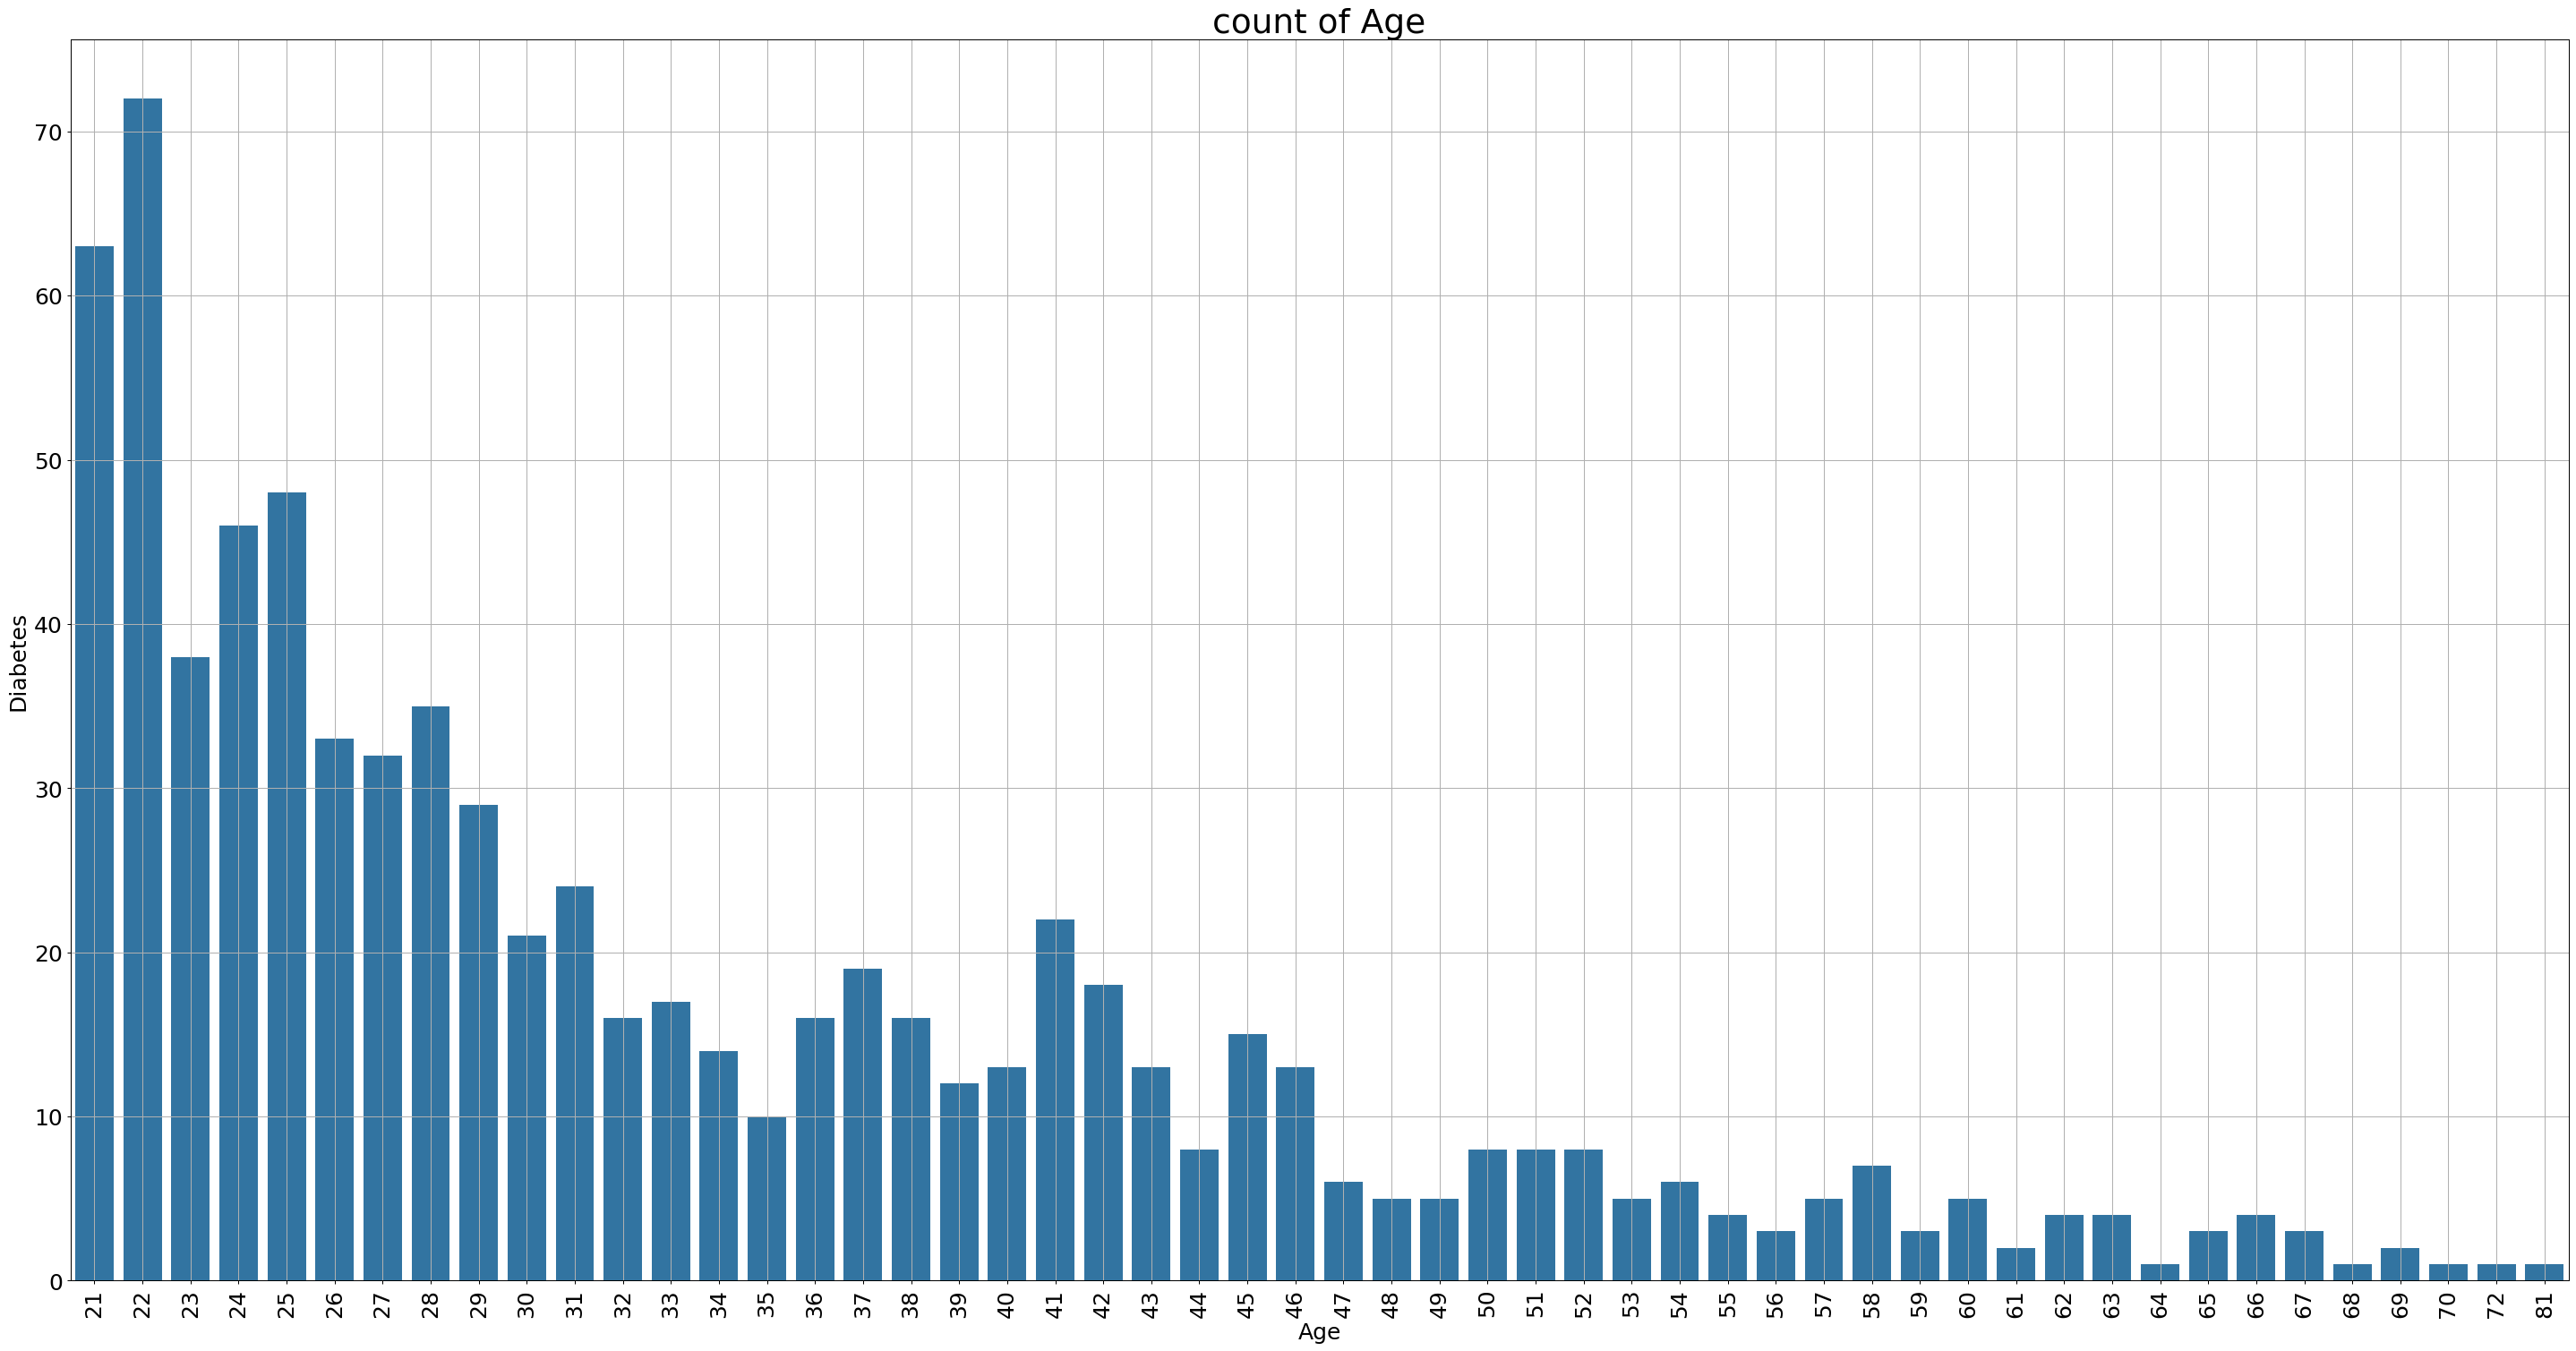

In [22]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Age',data=df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Age',fontsize=30)
plt.grid()

In [23]:
df1=df[df['SkinThickness']>0]
df1=df1[df1['SkinThickness']<90]
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0


In [24]:
df2=df1.dropna(how="any")
df2.reset_index(drop=True, inplace=True)

In [25]:
x=pd.DataFrame(df2, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y=df2.Outcome.values.reshape(-1,1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,89,66,23,94,28.1,0.167,21
3,137,40,35,168,43.1,2.288,33
4,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...
535,170,74,31,0,44.0,0.403,43
536,101,76,48,180,32.9,0.171,63
537,122,70,27,0,36.8,0.340,27
538,121,72,23,112,26.2,0.245,30


In [26]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.35, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7671957671957672


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
clf.classes_

array([0, 1], dtype=int64)

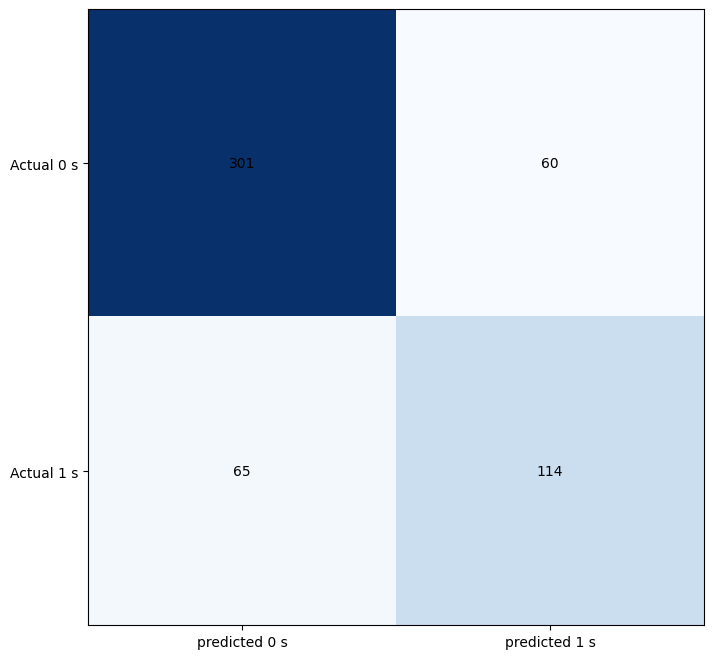

In [34]:
cm=confusion_matrix(y,clf.predict(x))
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0 s' , 'predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0 s' , 'Actual 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
        
plt.show()

In [35]:
print(classification_report(y,clf.predict(x) ))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       361
           1       0.66      0.64      0.65       179

    accuracy                           0.77       540
   macro avg       0.74      0.74      0.74       540
weighted avg       0.77      0.77      0.77       540



In [36]:
p1=clf.predict([[60,32,43,93,29.7,0.371,60]])
p1

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(5)
print(cross_val_score (clf,x, y.ravel(), cv=k_fold , n_jobs=1))

[0.7962963  0.66666667 0.75       0.78703704 0.77777778]


In [38]:
540/5

108.0

In [40]:
df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [41]:
x1=pd.DataFrame(df5, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y1=df5.Outcome.values.reshape(-1,1)

In [42]:
x_train, x_test, y_train,y_test= train_test_split(x1,y1, test_size= 0.35, random_state=0)

In [43]:
clf=GaussianNB()
clf.fit(x_train, y_train.ravel())
y_pred=clf.predict (x_test)

In [44]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8410596026490066


In [45]:
confusion_matrix(y1,clf.predict (x1))

array([[255,  41],
       [ 46,  89]], dtype=int64)

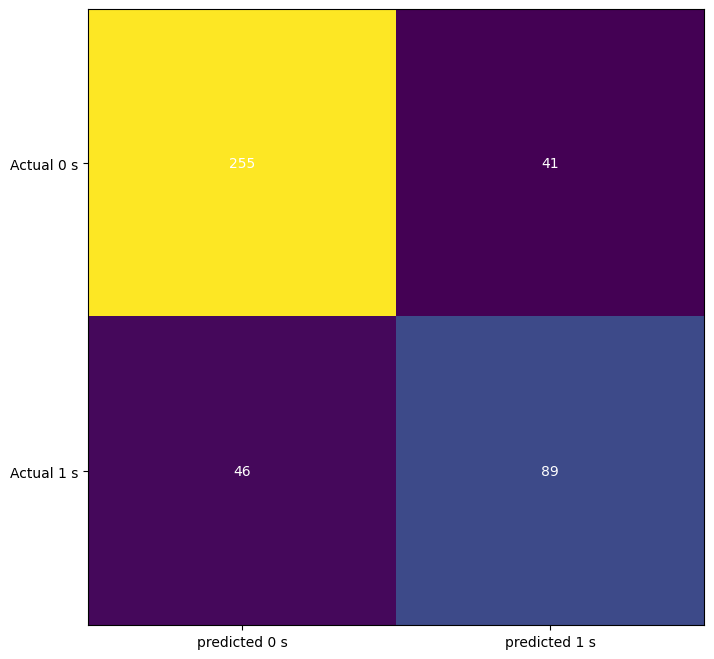

In [46]:
cm=confusion_matrix(y1,clf.predict(x1))
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0 s' , 'predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0 s' , 'Actual 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
        
        
plt.show()

In [47]:
p2=clf.predict([[60,32,43,93,29.7,0.371,60]])
p2

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [48]:
print(classification_report(y1,clf.predict(x1) ))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       296
           1       0.68      0.66      0.67       135

    accuracy                           0.80       431
   macro avg       0.77      0.76      0.76       431
weighted avg       0.80      0.80      0.80       431

